# Diabetes Dataset – Exploratory Data Analysis (EDA)

## Imports & Setup

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA Header

In [23]:
print("=" * 70)
print("EXPLORATORY ANALYSIS")
print("=" * 70)

EXPLORATORY ANALYSIS


## Load the Dataset

In [24]:
df = pd.read_csv('DatasetofDiabetes.csv')

## Remove ID Columns & Duplicates

In [25]:
df = df.drop(["ID", "No_Pation"], axis=1, errors="ignore")
df = df.drop_duplicates()
print(f"Rows after dropping duplicates: {df.shape[0]}")

Rows after dropping duplicates: 831


## Numeric Columns and Missing Values

In [26]:
numeric_cols = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

if df.isnull().values.any():
    print("Warning: Null values exist!")
print(df.isnull().sum())

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


## Outlier Handling (IQR + Median)

In [27]:
print("\n" + "=" * 70)
print("OUTLIER HANDLING (IQR + Median Replacement)")
print("=" * 70)

total_outliers = 0
for col in numeric_cols:
    if col not in df.columns:
        print(f"Skipping missing numeric column: {col}")
        continue

    df[col] = pd.to_numeric(df[col], errors='coerce')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    outlier_mask = (df[col] < lower) | (df[col] > upper)
    outlier_count = int(outlier_mask.sum())
    total_outliers += outlier_count

    df.loc[outlier_mask, col] = median
    print(f"{col:<6}: {outlier_count:3d} outliers replaced with median = {median}")

print(f"\nTotal outliers replaced across numeric columns: {total_outliers}")


OUTLIER HANDLING (IQR + Median Replacement)
Urea  :  57 outliers replaced with median = 4.6
Cr    :  46 outliers replaced with median = 59.0
HbA1c :   5 outliers replaced with median = 8.1
Chol  :  23 outliers replaced with median = 4.8
TG    :  36 outliers replaced with median = 2.0
HDL   :  42 outliers replaced with median = 1.1
LDL   :   7 outliers replaced with median = 2.5
VLDL  :  57 outliers replaced with median = 1.0
BMI   :   2 outliers replaced with median = 30.0

Total outliers replaced across numeric columns: 275


## Fix String Issues (Gender & CLASS)

In [28]:
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()

if 'CLASS' in df.columns:
    df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()

## Normalize CLASS Labels

In [29]:
if 'CLASS' in df.columns:
    print("\nRaw CLASS unique values:", df['CLASS'].unique())

    df['CLASS'] = df['CLASS'].replace({
        'Y': 'DIABETIC',
        'N': 'NONDIABETIC',
        'P': 'PREDIABETIC',
        'YES': 'DIABETIC',
        'NO': 'NONDIABETIC',
        'YEA': 'DIABETIC',
    })

    df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()
    print("Cleaned CLASS unique values:", df['CLASS'].unique())
else:
    raise KeyError("CLASS column not found in dataframe. Make sure your CSV contains CLASS column.")


Raw CLASS unique values: ['N' 'P' 'Y']
Cleaned CLASS unique values: ['NONDIABETIC' 'PREDIABETIC' 'DIABETIC']


## Gender Values Check

In [30]:
if 'Gender' in df.columns:
    print("Cleaned Gender unique values:", df['Gender'].unique())
else:
    print("Gender column not found in dataframe.")

Cleaned Gender unique values: ['F' 'M']


## Dataset Overview

In [31]:
print("\nDataset shape:", df.shape)
print("\nBasic info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe(include='all'))


Dataset shape: (831, 12)

Basic info:
<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  831 non-null    object 
 1   AGE     831 non-null    int64  
 2   Urea    831 non-null    float64
 3   Cr      831 non-null    int64  
 4   HbA1c   831 non-null    float64
 5   Chol    831 non-null    float64
 6   TG      831 non-null    float64
 7   HDL     831 non-null    float64
 8   LDL     831 non-null    float64
 9   VLDL    831 non-null    float64
 10  BMI     831 non-null    float64
 11  CLASS   831 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 84.4+ KB
None

Statistical Summary:
       Gender         AGE        Urea          Cr       HbA1c        Chol  \
count     831  831.000000  831.000000  831.000000  831.000000  831.000000   
unique      2         NaN         NaN         NaN         NaN         NaN   
top         M         

## Distribution of Diabetes Classes

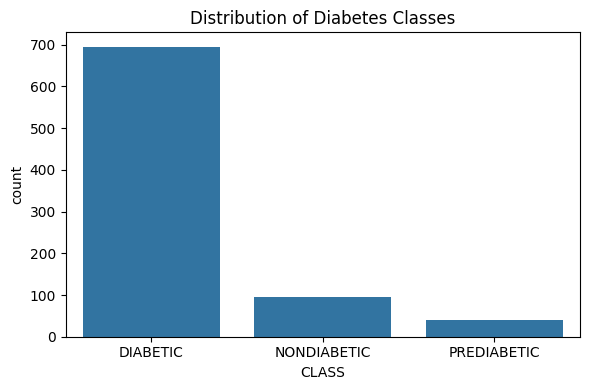

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="CLASS", order=sorted(df['CLASS'].unique()))
plt.title("Distribution of Diabetes Classes")
plt.tight_layout()
plt.show()

## Gender Distribution

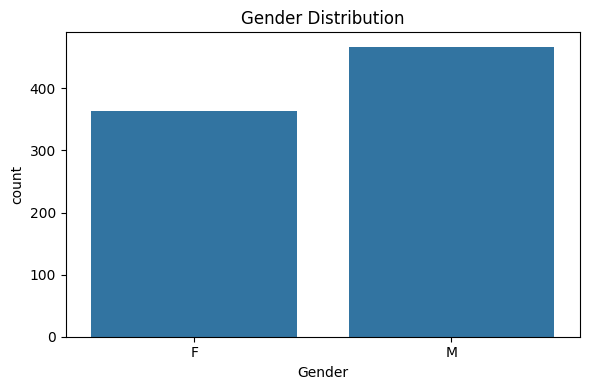

In [33]:
if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Gender", order=sorted(df['Gender'].unique()))
    plt.title("Gender Distribution")
    plt.tight_layout()
    plt.show()

## Diabetes Rate by Gender


Calculating diabetes rates by gender...

% Diabetes by Gender:
 Gender
F    80.494505
M    86.081370
dtype: float64


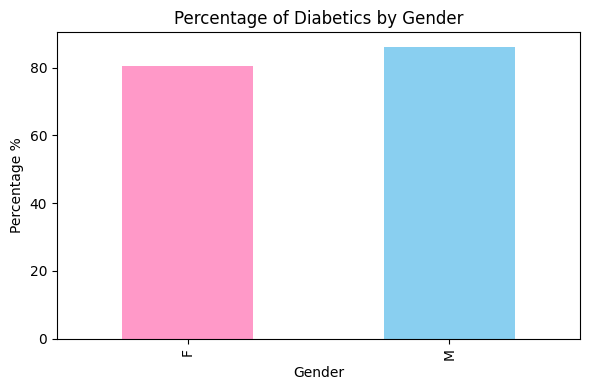

In [34]:
if 'Gender' in df.columns:
    print("\nCalculating diabetes rates by gender...")

    gender_counts = df.groupby("Gender").size()
    diabetic_counts_gender = df[df["CLASS"] == "DIABETIC"].groupby("Gender").size()

    diabetic_counts_gender = diabetic_counts_gender.reindex(gender_counts.index, fill_value=0)
    gender_diabetes_percent = (diabetic_counts_gender / gender_counts * 100).fillna(0)

    print("\n% Diabetes by Gender:\n", gender_diabetes_percent)

    plt.figure(figsize=(6,4))
    gender_diabetes_percent.plot(kind='bar', color=["#ff99c8", "#89cff0"][:len(gender_diabetes_percent)])
    plt.title("Percentage of Diabetics by Gender")
    plt.ylabel("Percentage %")
    plt.tight_layout()
    plt.show()
else:
    gender_diabetes_percent = pd.Series(dtype=float)
    print("\nGender column missing — skipping gender-based diabetes percentage.")

## Diabetes Rate by Age Group


% Diabetes by AGE Group:
 AGE_Group
Young     56.521739
Middle    37.222222
Old       97.929936
dtype: float64


C:\Users\omard\AppData\Local\Temp\ipykernel_13184\4164810209.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AGE_counts = df.groupby("AGE_Group").size()
C:\Users\omard\AppData\Local\Temp\ipykernel_13184\4164810209.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetic_counts_AGE = df[df["CLASS"] == "DIABETIC"].groupby("AGE_Group").size()


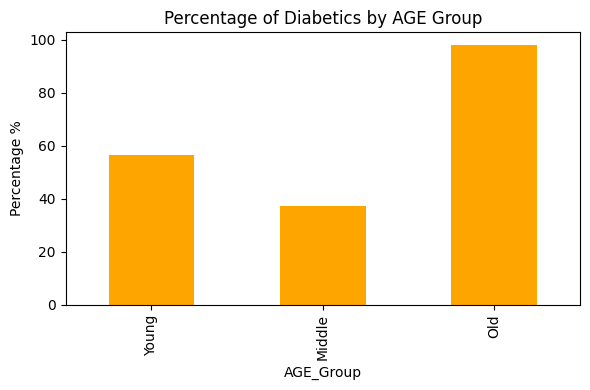

In [35]:
if 'AGE' in df.columns:
    df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
    df['AGE_Group'] = pd.cut(df['AGE'], bins=[0,30,50,120], labels=["Young", "Middle", "Old"])

    AGE_counts = df.groupby("AGE_Group").size()
    diabetic_counts_AGE = df[df["CLASS"] == "DIABETIC"].groupby("AGE_Group").size()
    diabetic_counts_AGE = diabetic_counts_AGE.reindex(AGE_counts.index, fill_value=0)
    AGE_diabetes_percent = (diabetic_counts_AGE / AGE_counts * 100).fillna(0)

    print("\n% Diabetes by AGE Group:\n", AGE_diabetes_percent)

    plt.figure(figsize=(6,4))
    AGE_diabetes_percent.plot(kind='bar', color='orange')
    plt.title("Percentage of Diabetics by AGE Group")
    plt.ylabel("Percentage %")
    plt.tight_layout()
    plt.show()
else:
    AGE_diabetes_percent = pd.Series(dtype=float)
    print("\nAGE column missing — skipping age-based diabetes percentage.")

## AGE Distribution Histogram

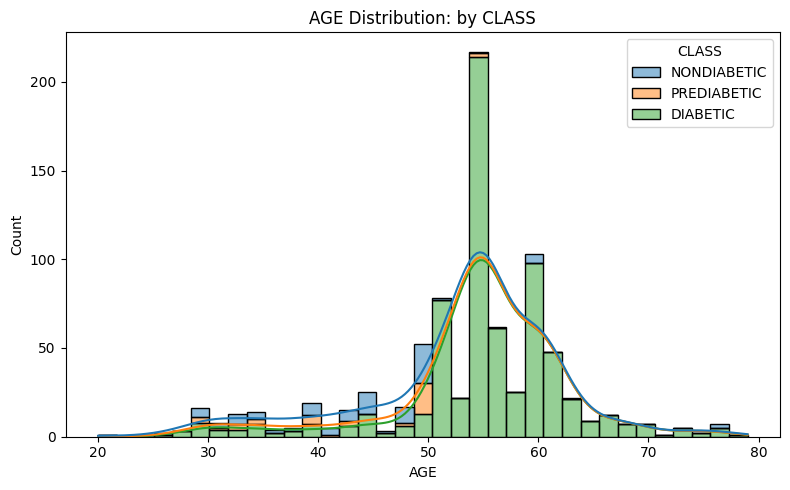

In [36]:
if 'AGE' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x="AGE", hue="CLASS", kde=True, multiple='stack')
    plt.title("AGE Distribution: by CLASS")
    plt.tight_layout()
    plt.show()

## Feature Comparison by Class

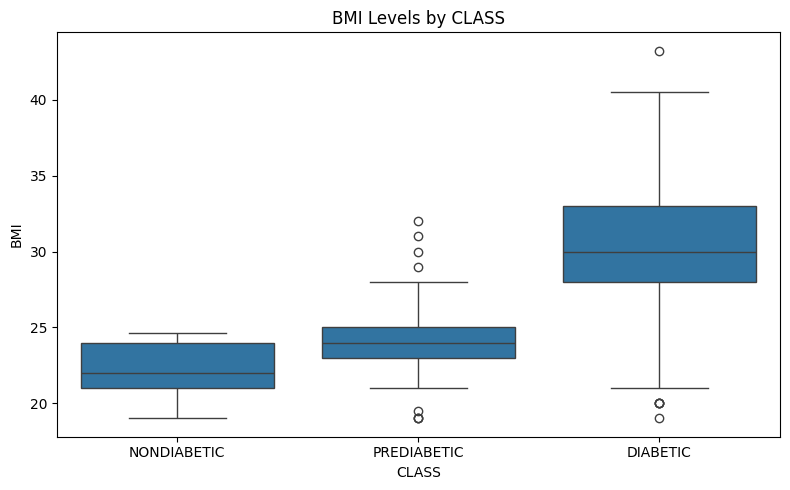

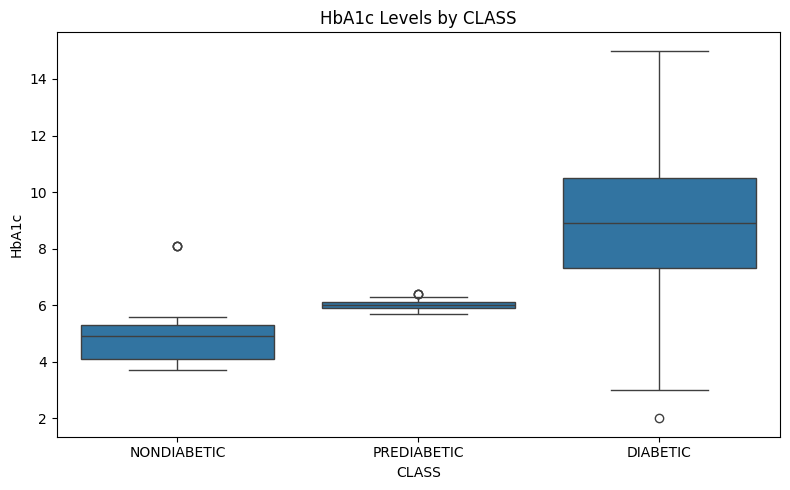

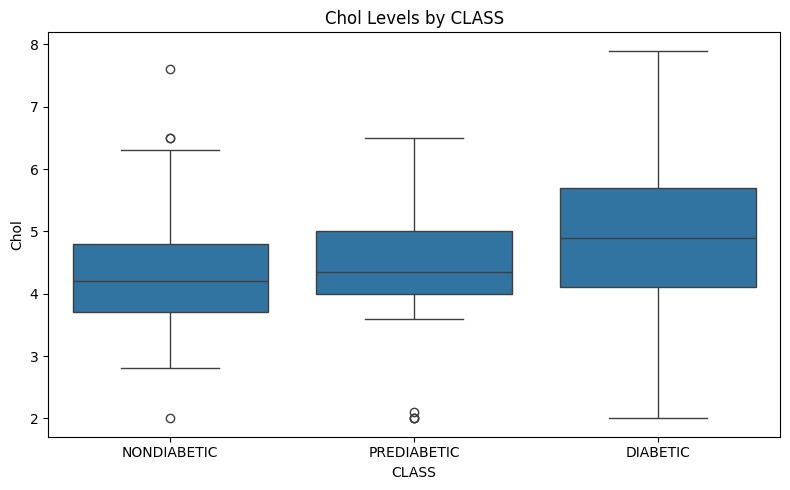

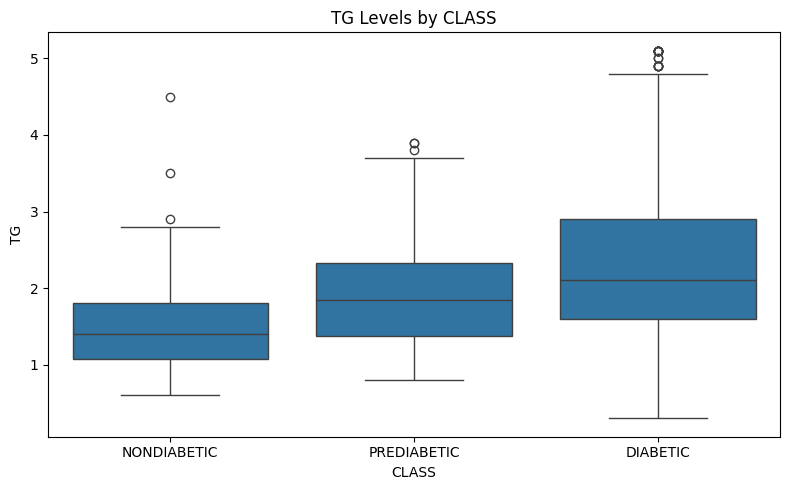

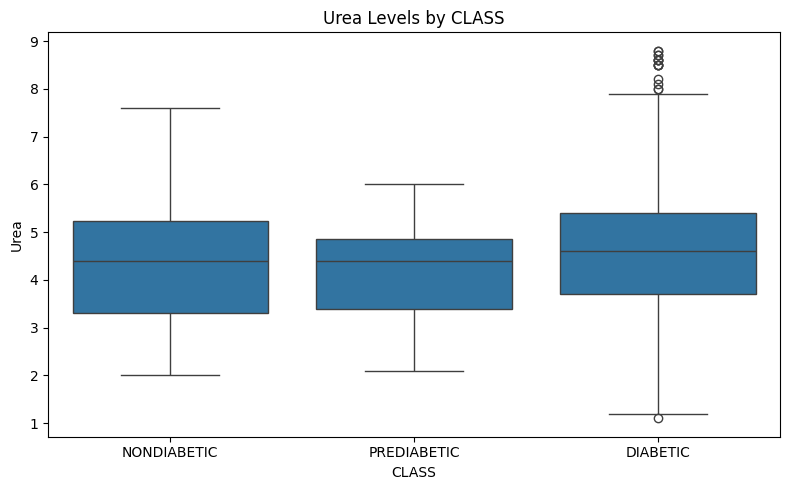

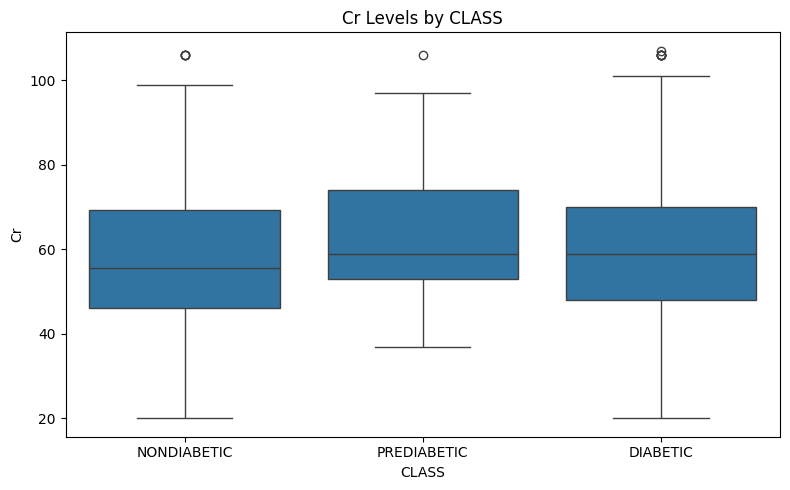

In [37]:
existing_key_features = [c for c in ["BMI", "HbA1c", "Chol", "TG", "Urea", "Cr"] if c in df.columns]
for col in existing_key_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="CLASS", y=col)
    plt.title(f"{col} Levels by CLASS")
    plt.tight_layout()
    plt.show()

## Correlation Heatmap

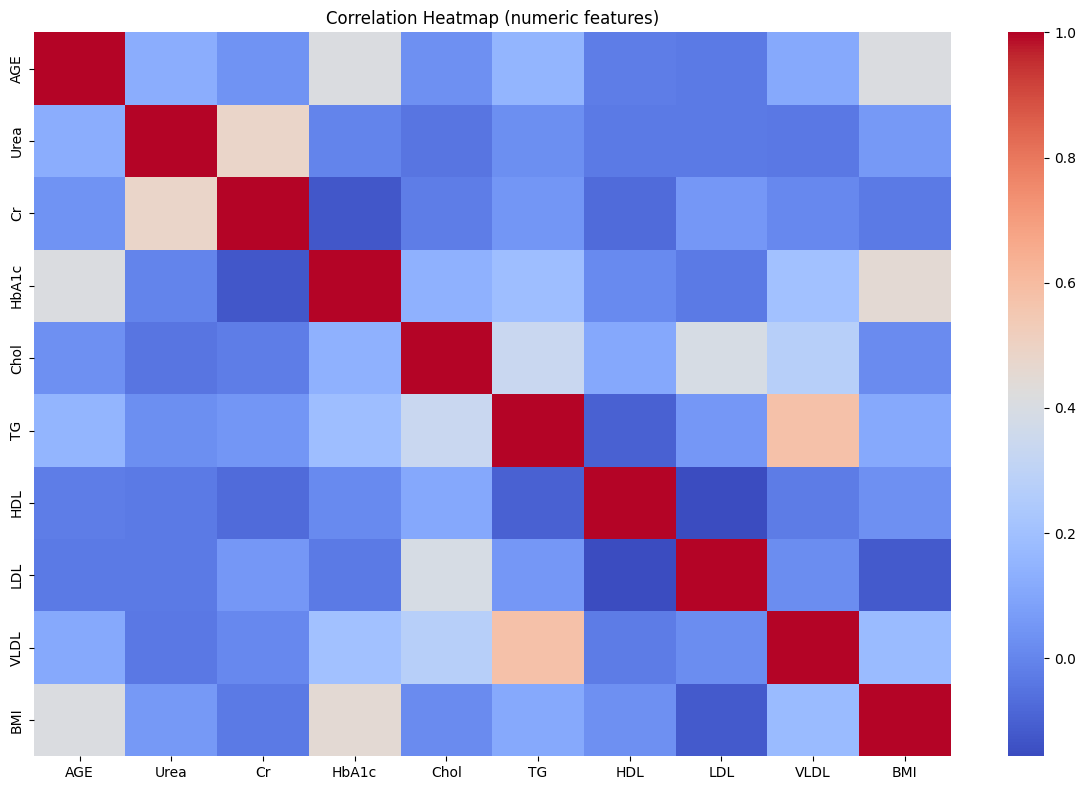

In [38]:
num_df = df.select_dtypes(include=np.number)
if not num_df.empty:
    plt.figure(figsize=(12,8))
    sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
    plt.title("Correlation Heatmap (numeric features)")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numeric columns available for correlation heatmap.")

## Gender vs Class Heatmap


Gender vs CLASS crosstab:
 CLASS   DIABETIC  NONDIABETIC  PREDIABETIC
Gender                                    
F            293           58           13
M            402           38           27


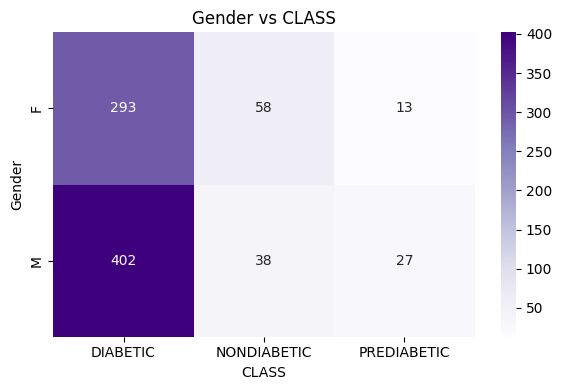

In [39]:
if 'Gender' in df.columns:
    matrix = pd.crosstab(df["Gender"], df["CLASS"])
    print("\nGender vs CLASS crosstab:\n", matrix)
    plt.figure(figsize=(6,4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Purples")
    plt.title("Gender vs CLASS")
    plt.tight_layout()
    plt.show()

## Pairplot

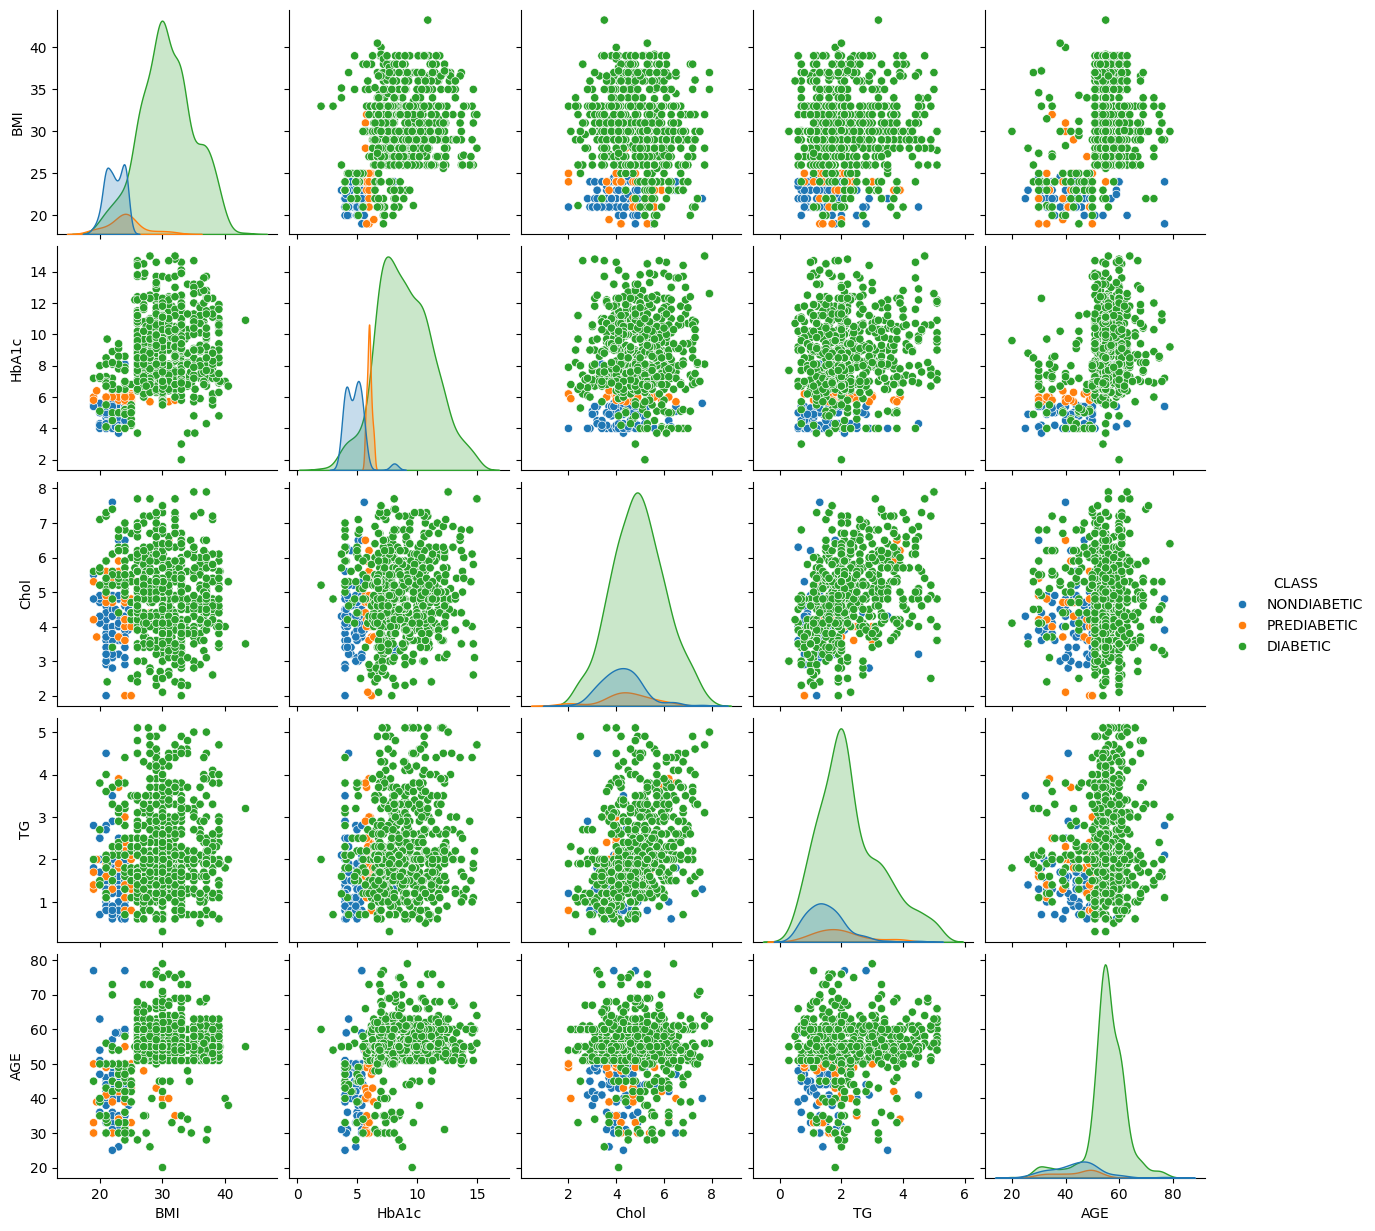

In [40]:
pair_cols = [c for c in ["BMI","HbA1c","Chol","TG","AGE","CLASS"] if c in df.columns]
if len(pair_cols) >= 3 and df.shape[0] <= 2000:
    sns.pairplot(df[pair_cols], hue="CLASS")
    plt.show()
else:
    print("\nSkipping pairplot (insufficient columns or too many rows).")

## HbA1c vs BMI Scatter Plot

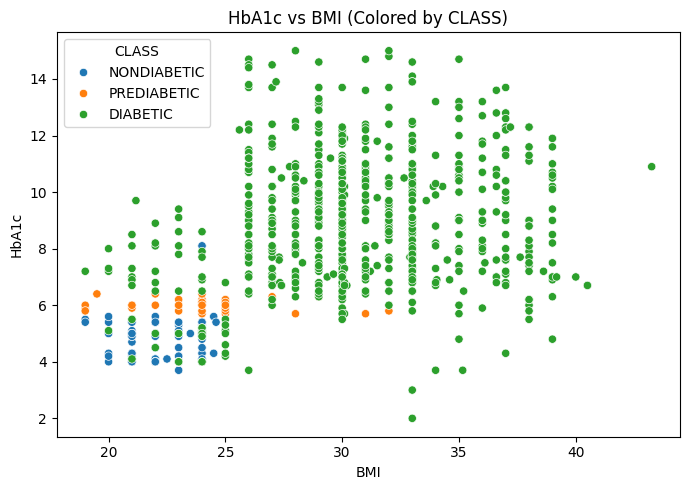

In [41]:
if "BMI" in df.columns and "HbA1c" in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x="BMI", y="HbA1c", hue="CLASS")
    plt.title("HbA1c vs BMI (Colored by CLASS)")
    plt.tight_layout()
    plt.show()

## Summary

In [42]:
print("\n" + "="*80)
print("SUMMARY OF KEY FINDINGS")
print("="*80)

print("\n1. Gender Diabetes Risk (percentages):")
print(gender_diabetes_percent if not gender_diabetes_percent.empty else "Not available")

print("\n2. AGE Group Diabetes Risk (percentages):")
print(AGE_diabetes_percent if not AGE_diabetes_percent.empty else "Not available")

print("\n3. Observed Strong Predictors (Visually):")
print("- HbA1c (if present) generally separates diabetic patients from others.")
print("- BMI (if present) tends to be higher for diabetic patients.")
print("- Chol, TG, Urea, Cr show differences across classes when present.")
print("- Older age groups typically show higher diabetes prevalence when AGE exists in dataset.")

print("\nEDA Completed.")


SUMMARY OF KEY FINDINGS

1. Gender Diabetes Risk (percentages):
Gender
F    80.494505
M    86.081370
dtype: float64

2. AGE Group Diabetes Risk (percentages):
AGE_Group
Young     56.521739
Middle    37.222222
Old       97.929936
dtype: float64

3. Observed Strong Predictors (Visually):
- HbA1c (if present) generally separates diabetic patients from others.
- BMI (if present) tends to be higher for diabetic patients.
- Chol, TG, Urea, Cr show differences across classes when present.
- Older age groups typically show higher diabetes prevalence when AGE exists in dataset.

EDA Completed.
